In [59]:
!git clone https://github.com/imojlish/safeclinic.git
%cd safeclinic

Cloning into 'safeclinic'...
remote: Enumerating objects: 44, done.
remote: Counting objects: 100% (44/44), done.
remote: Compressing objects: 100% (44/44), done.
remote: Total 44 (delta 13), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (44/44), 20.93 MiB | 12.28 MiB/s, done.
Resolving deltas: 100% (13/13), done.
/content/safeclinic/safeclinic


In [80]:
# Install necessary packages (if running in Colab)
!pip install opencv-python
from google.colab.patches import cv2_imshow  # Only needed if you're using Colab
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

# Load the face detector and mask detector model
faceCascade = cv2.CascadeClassifier("haarcascade_frontalface_alt2.xml")
model = load_model("mask_recog.h5")

def face_mask_detector(frame):
    # Convert the frame to grayscale for face detection
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray,
                                         scaleFactor=1.05,
                                         minNeighbors=3,
                                         minSize=(60, 60),
                                         flags=cv2.CASCADE_SCALE_IMAGE)

    # Create a blurred version of the background
    blurred_frame = cv2.GaussianBlur(frame, (21, 21), 0)

    # List for detected faces and predictions
    faces_list = []
    preds = []

    # Process each detected face
    for (x, y, w, h) in faces:
        # Extract face region
        face_frame = frame[y:y+h, x:x+w]

        # Preprocess face for mask model
        face_frame_rgb = cv2.cvtColor(face_frame, cv2.COLOR_BGR2RGB)
        face_frame_resized = cv2.resize(face_frame_rgb, (224, 224))
        face_frame_array = img_to_array(face_frame_resized)
        face_frame_array = np.expand_dims(face_frame_array, axis=0)
        face_frame_array = preprocess_input(face_frame_array)

        # Predict mask or no mask
        faces_list.append(face_frame_array)
        if len(faces_list) > 0:
            preds = model.predict(faces_list)

        # Process prediction results
        for pred in preds:
            (mask, withoutMask) = pred
            label = "Mask" if mask > withoutMask else "No Mask"
            color = (0, 255, 0) if label == "Mask" else (0, 0, 255)
            label = "{}: {:.2f}%".format(label, max(mask, withoutMask) * 100)

            # Draw label and bounding box on original frame
            cv2.putText(frame, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, color, 2)
            cv2.rectangle(frame, (x, y), (x + w, y + h), color, 2)

            # Replace background around face with blurred background
            frame[y:y+h, x:x+w] = face_frame  # Keep face area unblurred
            frame = np.where(frame == 0, blurred_frame, frame)  # Blend background with blur

    return frame




1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


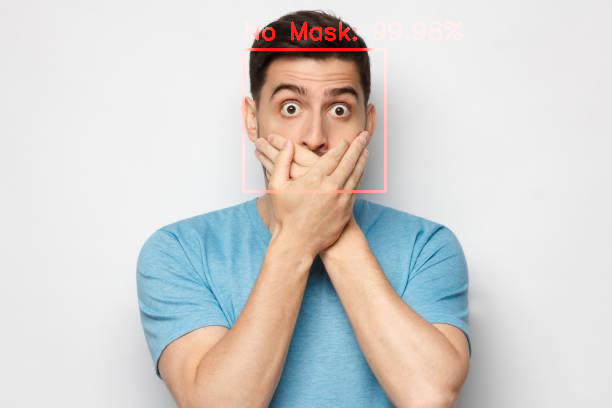

In [81]:
input_image = cv2.imread("image10.jpeg")
output = face_mask_detector(input_image)
cv2_imshow(output)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


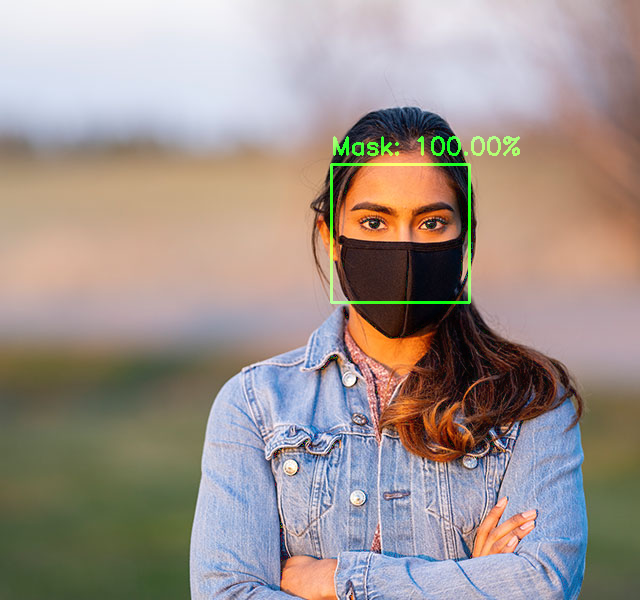

In [82]:
# Example usage (displaying the frame in Google Colab)
input_image = cv2.imread("image7.jpg")
if input_image is not None:
    output_image = face_mask_detector(input_image)
    cv2_imshow(output_image)
else:
    print("Error: Image could not be loaded.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


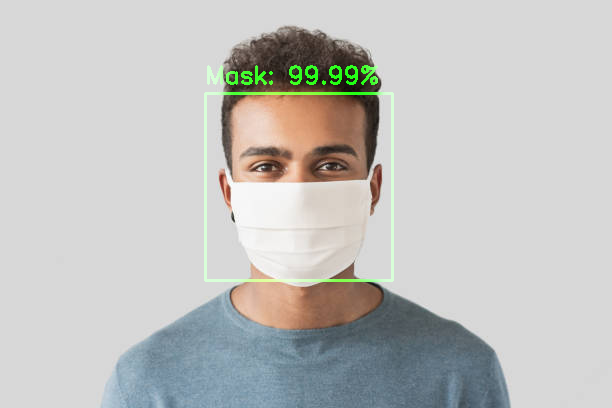

In [83]:
input_image = cv2.imread("image6.jpg")
output = face_mask_detector(input_image)
cv2_imshow(output)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


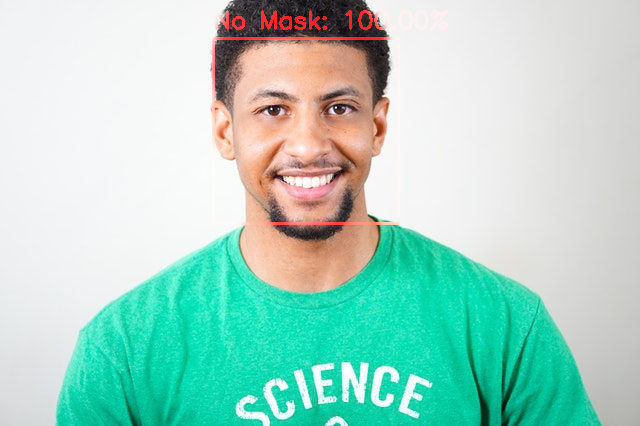

In [86]:
input_image = cv2.imread("image4.jpg")
if input_image is not None:
    output_image = face_mask_detector(input_image)
    cv2_imshow(output_image)
else:
    print("Error: Image could not be loaded.")
